In [2]:
import numpy as np
import sys,os
from time import time
import matplotlib.pyplot as plt
sys.path.append('../../')
from paths import *
import pyFCI

start = time()
geometry = 'Ising-square'
eps = 1E-7
L = 100

T_list = np.arange(2,3+eps,.1)

# Model fit

d=1.3939731299624194 +- 0.1372688460312035


[]

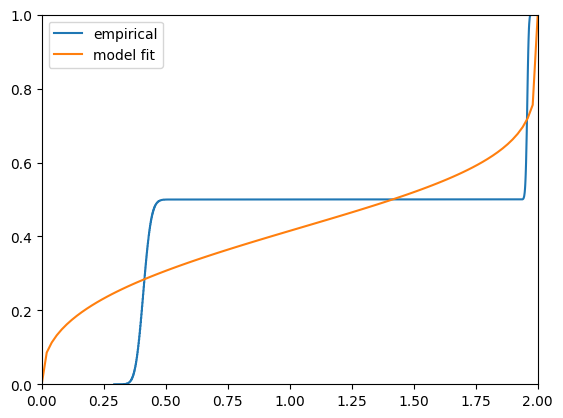

In [7]:
T = 1.8
L = 60
M_flag = 0
resultsfolder = makefolder(base=f'results/FCI/',
                           create_folder=False,
                           precision=2,
                           L=L,
                           T=float(T),
                           M_flag=M_flag,
                           )

rs, fci = np.loadtxt(resultsfolder + 'fci.txt',unpack=True)
d, x0, err = np.loadtxt(resultsfolder + 'FCI_fit.txt')

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(rs, fci, label="empirical")

xs = np.linspace(0,2,100)
ys = pyFCI.analytical_FCI(xs,d-1,1)
ax.plot(xs, ys, label="model fit")

ax.legend(loc='upper left')
ax.set_xlim([0,2])
ax.set_ylim([0,1])

print(f'{d=} +- {err}')
plt.plot()

In [5]:
T_list = np.arange(2,3+eps,.1)
L = 60

if False:
  T_list = np.arange(1.8,2.1+eps,.1)
  T_list = np.concatenate((T_list,
                          np.arange(2.2,2.4+eps,.01))
                          )
  T_list = np.concatenate((T_list,
                          # np.array([2.5])
                          np.arange(2.5,3+eps,.1)
                          )
                          )

M_flags=[1]
global_flags=[0]

ks = list(range(10,25))
center = 0

ds = np.zeros(shape=(len(T_list),
                     len(M_flags),
                     len(global_flags))
              )

for global_flag_id,global_flag in enumerate(global_flags):
  for M_id,M_flag in enumerate(M_flags):
    for T_id,T in enumerate(T_list):
      resultsfolder = makefolder(base=f'results/FCI/',
                              create_folder=False,
                              precision=2,
                              global_flag=global_flag,
                              L=L,
                              T=float(T),
                              M_flag=M_flag,
                              )
      if global_flag:
        ds[T_id,M_id,global_flag_id], x0, err = np.loadtxt(resultsfolder + 'FCI_fit.txt')
      else:
        ds[T_id,M_id,global_flag_id], x0, err = np.loadtxt(resultsfolder + f'FCI_fit_center{center}_ks{ks}.txt')


fig = plt.figure()
ax = fig.add_subplot()

for global_flag_id,global_flag in enumerate(global_flags):
  for M_id,M_flag in enumerate(M_flags):
    lbl = f'{L=}'
    if M_flag:
      lbl += ' ; M>0'
    # if global_flag:
    #   lbl += ' ; global'
    # else:
    ax.plot(T_list, 
            ds[:,M_id,global_flag_id]/L**2,
            '-o',
            label=lbl)

ax.set_yscale('log')
ax.set_xlabel('T')
ax.set_ylabel('FCI ID per bit')
ax.legend()
plt.plot()


FileNotFoundError: results/FCI/global_flag_0/L_60/T_2.00/M_flag_0/FCI_fit_center0_ks[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24].txt not found.

In [ ]:
FCI_fit_center0_ks[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]